<a href="https://colab.research.google.com/github/samilarinc/crypto_prediction/blob/master/Crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from scipy import signal
import pandas_datareader as web
import datetime as dt

import sklearn.model_selection

import random

In [2]:
crypto_currency = 'BTC'
against_currency = 'USD'

start = dt.datetime(2016,1,1)
end = dt.datetime.now()

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [4]:
data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)

In [5]:
data.keys()

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [6]:
length = len(data['High'])

In [7]:
my_arr = list()
for i in range(length):
    my_arr.append(i)

In [8]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,436.246002,427.515015,430.721008,434.334015,3.627890e+07,434.334015
2016-01-02,436.062012,431.869995,434.622009,433.437988,3.009660e+07,433.437988
2016-01-03,433.743011,424.705994,433.578003,430.010986,3.963380e+07,430.010986
2016-01-04,434.516998,429.084015,430.061005,433.091003,3.847750e+07,433.091003
2016-01-05,434.182007,429.675995,433.069000,431.959991,3.452260e+07,431.959991
...,...,...,...,...,...,...
2021-09-08,47261.949219,45669.738281,45774.742188,46391.421875,3.867266e+10,46391.421875
2021-09-09,47031.742188,44344.484375,46396.664062,44883.910156,3.915467e+10,44883.910156
2021-09-10,45969.292969,44818.265625,44869.839844,45201.457031,3.449984e+10,45201.457031


In [9]:
data.drop_duplicates(inplace=True)

In [47]:
data.index = my_arr
dictdata = data.to_dict()
highs = list(dictdata['High'].values())
lows = list(dictdata['Low'].values())
opens = list(dictdata['Open'].values())
closes = list(dictdata['Close'].values())
volumes = list(dictdata['Volume'].values())
adjs = list(dictdata['Adj Close'].values())
lists = [highs, lows, opens, closes, volumes, adjs]

In [26]:
prev_days = 60

In [27]:
data

,High,Low,Open,Close,Volume,Adj Close
0,436.246002,427.515015,430.721008,434.334015,3.627890e+07,434.334015
1,436.062012,431.869995,434.622009,433.437988,3.009660e+07,433.437988
2,433.743011,424.705994,433.578003,430.010986,3.963380e+07,430.010986
3,434.516998,429.084015,430.061005,433.091003,3.847750e+07,433.091003
4,434.182007,429.675995,433.069000,431.959991,3.452260e+07,431.959991
...,...,...,...,...,...,...
2074,47261.949219,45669.738281,45774.742188,46391.421875,3.867266e+10,46391.421875
2075,47031.742188,44344.484375,46396.664062,44883.910156,3.915467e+10,44883.910156
2076,45969.292969,44818.265625,44869.839844,45201.457031,3.449984e+10,45201.457031
2077,46364.878906,44790.460938,45206.628906,46063.269531,2.788198e+10,46063.269531


In [48]:
train_high = [] 
train_low = []
train_open = []
train_close = []
train_volume = []
train_adj = []

out_high = []
out_low = []
out_open = []
out_close = []
out_volume = []
out_adj = []

i = 0

In [49]:
while i+prev_days < length:
    train_high.append(highs[i:i+prev_days])
    out_high.append(highs[i+prev_days])

    train_low.append(lows[i:i+prev_days])
    out_low.append(lows[i+prev_days])

    train_open.append(opens[i:i+prev_days])
    out_open.append(opens[i+prev_days])

    train_close.append(closes[i:i+prev_days])
    out_close.append(closes[i+prev_days])

    train_volume.append(volumes[i:i+prev_days])
    out_volume.append(volumes[i+prev_days])

    train_adj.append(adjs[i:i+prev_days])
    out_adj.append(adjs[i+prev_days])

    i += 1

In [50]:
train_lists = [train_high, train_low, train_open, train_close, train_volume, train_adj]
out_lists = [out_high, out_low, out_open, out_close, out_volume, out_adj] 

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
alpha = 0.95
regressor = GradientBoostingRegressor(loss='ls', alpha=alpha,
                                n_estimators=400, max_depth=4,
                                learning_rate=0.05)

In [53]:
regressor.fit(train_close, out_close)

GradientBoostingRegressor(alpha=0.95, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

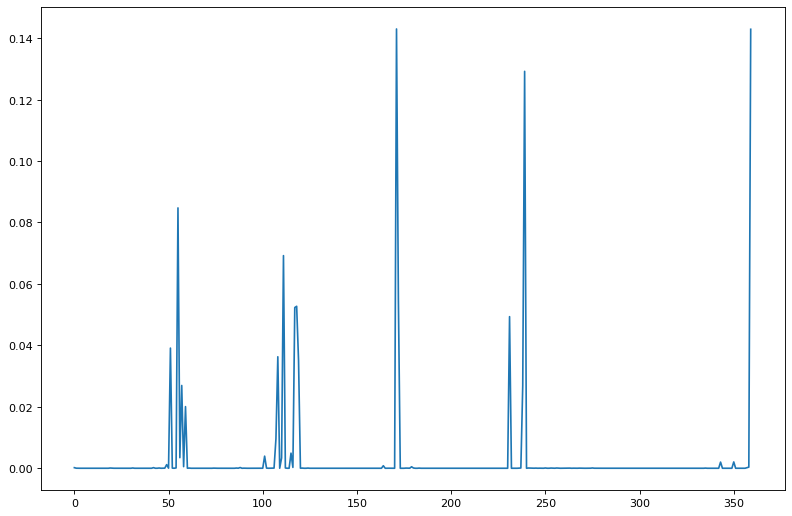

In [100]:
import matplotlib.pyplot
from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=80)
plt.plot(regressor.feature_importances_)

In [63]:
prediction = regressor.predict(np.array(closes[-65:-5]).reshape(1, -1))

In [70]:
single_train_list = []
for i in range(length-prev_days):
    single_train_list.append(train_lists[0][i])
    single_train_list[i].extend(train_lists[1][i])
    single_train_list[i].extend(train_lists[2][i])
    single_train_list[i].extend(train_lists[3][i])
    single_train_list[i].extend(train_lists[4][i])
    single_train_list[i].extend(train_lists[5][i])

In [111]:
regressor.fit(single_train_list[:-1], out_close[1:])

GradientBoostingRegressor(alpha=0.95, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [118]:
prediction = regressor.predict(np.array(single_train_list[-1]).reshape(1, -1))
real_values = out_close[-1]
print(real_values, prediction[0])

44524.56640625 45207.048111948796


In [112]:
regressor.score(single_train_list, out_close)

0.9973292418757879